In [2]:
from diffusers import DDPMScheduler, UNet2DModel
from models.ddpm_unet2d import DDPMUNet2D
model_id = "google/ddpm-cat-256"
scheduler: DDPMScheduler = DDPMScheduler.from_pretrained(model_id)
unet: UNet2DModel = UNet2DModel.from_pretrained(model_id)
model = DDPMUNet2D(unet=unet,scheduler=scheduler).cuda()
model.eval()

2025-07-26 02:06:58.600 | DEBUG    | models.ddpm_unet2d:__init__:374 - Init DDPMUnet2D with config:
{
    "unet": {
        "sample_size": [
            256,
            256
        ],
        "in_channels": 3,
        "out_channels": 3,
        "down_block_types": [
            "DownBlock2D",
            "DownBlock2D",
            "DownBlock2D",
            "DownBlock2D",
            "AttnDownBlock2D",
            "DownBlock2D"
        ],
        "mid_block_type": "UNetMidBlock2D",
        "up_block_types": [
            "UpBlock2D",
            "AttnUpBlock2D",
            "UpBlock2D",
            "UpBlock2D",
            "UpBlock2D",
            "UpBlock2D"
        ],
        "block_out_channels": [
            128,
            128,
            256,
            256,
            512,
            512
        ],
        "act_fn": "silu",
        "time_embedding_type": "positional",
        "center_input_sample": false,
        "layers_per_block": 2,
        "time_embedding_dim": null,


DDPMUNet2D(
  (unet): UNet2DModel(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (time_proj): Timesteps()
    (time_embedding): TimestepEmbedding(
      (linear_1): Linear(in_features=128, out_features=512, bias=True)
      (act): SiLU()
      (linear_2): Linear(in_features=512, out_features=512, bias=True)
    )
    (down_blocks): ModuleList(
      (0-1): 2 x DownBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsampler

In [7]:
import torch
images = model.generate(torch.randn([4,3,256,256]),50, clamp_output=True).permute(0,2,3,1).cpu().numpy()
torch.cuda.empty_cache()

Generating 4 samples - Steps: 0/50 [          ] ?it/s

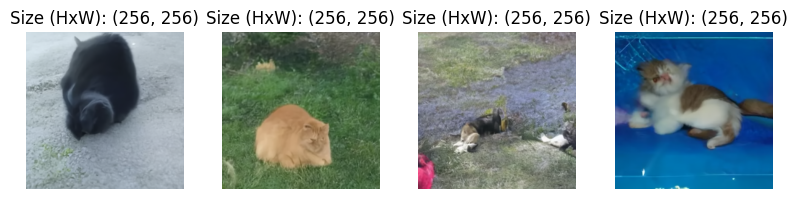

In [8]:
from ds_utils.huggan_smithsonian_butterflies_subset import DataModule
torch.cuda.empty_cache()
DataModule.show(images, len(images))
